# Data : read & prepare

In [6]:
data <- read.csv2('data.csv')

In [7]:
y1 <- data$CUM360
y2 <- data$GAS360

x <- data[,grep("Avg.", names(data))]
x <- lapply(x, function(x) {gsub(",", ".", x)})

indx <- sapply(x, is.character)
x[indx] <- lapply(x[indx], function(x) as.numeric(x))

Warning message:
In FUN(X[[i]], ...) : NAs introduced by coercion


# Linear regression for y1

In [8]:
df1 <- data.frame(y = y1, x)
df1 <- na.omit(df1)

In [9]:
model <- lm(y ~ ., df1)
summary(model)


Call:
lm(formula = y ~ ., data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14646 -0.26017 -0.01827  0.23131  1.38206 

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                          -0.2459638  0.0324914
Avg.LATERAL_LENGTH..for                               0.0778966  0.0375176
Avg.TOTAL_TVD..for                                    0.3506189  0.1043597
Avg.TOTAL_MD..for                                     0.0228646  0.0394392
Avg.ISIP_.Instant_Shut.in_Pressure_psi...for          0.0103501  0.0531031
Avg.Frac_Gradient_.psi.ft...for                       0.0116411  0.0614098
Avg.Breakdown_Pressure_.psi...for                    -0.1001254  0.0298224
Avg.Final_.Post_Treatment_Shut.in_Pressure_psi...for  0.0013986  0.0406659
Avg.Pre_Treatment_Shut.in_Pressure_.psi...for         0.2207625  0.0506567
Avg.Min_.reat_Rate_.bpm...for                        -0.0097244  0.0072934
Avg.Max_Treat_Rat

In [13]:
simple <- step(model, direction = "both", trace = 0)

In [14]:
summary(simple)


Call:
lm(formula = y ~ Avg.LATERAL_LENGTH..for + Avg.TOTAL_TVD..for + 
    Avg.Breakdown_Pressure_.psi...for + Avg.Pre_Treatment_Shut.in_Pressure_.psi...for + 
    Avg.Avg_Treat_Rate_.bpm...for + Avg.Avg_Treat_Pressure_.psi...for + 
    Avg.Entered_.Shot_.Total..for + Avg.Shot_.Density_.shots.ft..for + 
    Avg.Stage_.Length_.Calculated.Field...for + Avg.NO_.of_.STAGES..for + 
    Avg.Vp_PT_PLEASANT..for + Avg.PAYFLAG_.NTG...for + Avg.YOUNG.S_MODULUS_PT_PLEASANT..for + 
    Avg.POISSON_RATIO_PT_PLEASANT..for + Avg.GIPTOT_.bcf.section._PT_PLEASANT..for + 
    Avg.THICKNESS_PT_PLEASANT..for + Avg.MATURITY_PT_.PLEASANT..for + 
    Avg.UPLIFT_MAGNITUDE_.PT_PLEASANT..for + Avg.MAX_DEPTH_BURIAL_PT_PLEASANT..for + 
    Avg.TEMP_ANAMOLY_PT_PLEASANT..for + Avg.RESISTIVITY_PT_PLEASANT..for + 
    Avg.GR_PT_PLEASANT..for + Avg.VTOC_PT_PLEASANT..for + Avg.VCARB_PT_PLEASANT..for + 
    Avg.POROSITY.FROM.DENSITY.LOGS..for, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.197

# Predict & plot

Warning message:
In predict.lm(simple, interval = "pred") :
  predictions on current data refer to _future_ responses



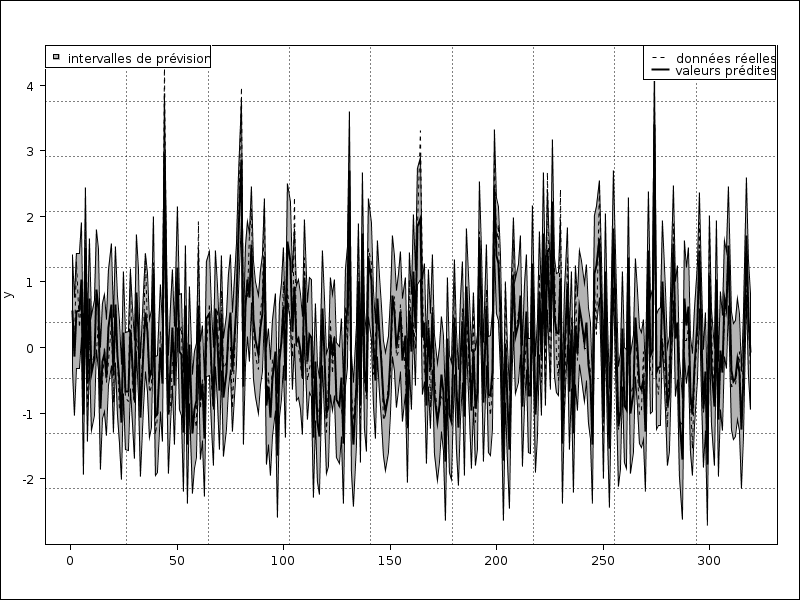

In [44]:
p <- predict(simple, interval = "pred")
low <- p[,2]
high <- p[,3]
fitted <- simple$fitted.values
N <- 1:nrow(simple$model)
par(mfrow=c(1,1), las = 1)
matplot(N,cbind(low, high), type = "n",xlab = "",
        ylab = names(simple$model[1]), axes = TRUE)
grid(9,lwd=1, col="1")
polygon(c(N,rev(N)),c(low,rev(high)), col = "grey70")
lines(simple$model[,1], lty = 2)
lines(fitted, lwd = 2)
legend("topleft", fill = "grey70",
       c("intervalles de prévision"),
       xjust=1)
legend("topright",
       c("données réelles","valeurs prédites"),
       lty = c(2,1), lwd = c(1,2),
       xjust=1)

# Cross-Validation

Loading required package: DiceKriging


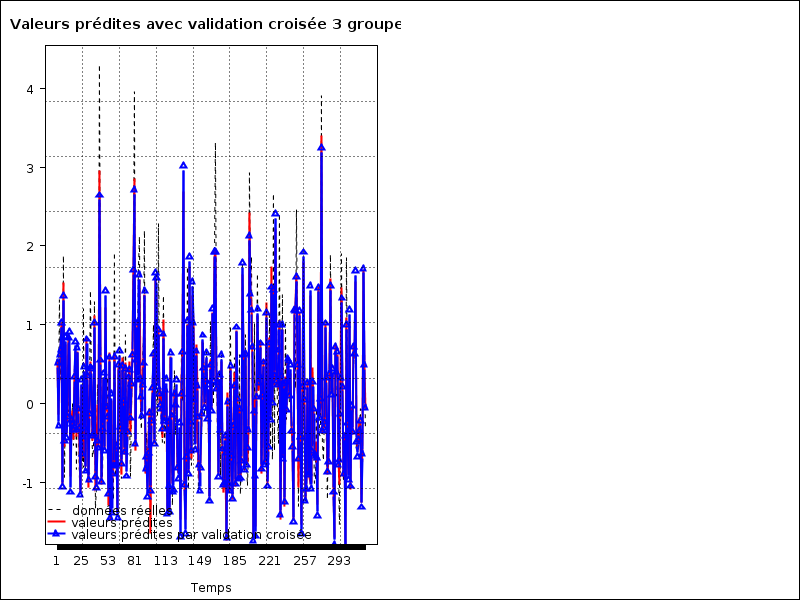

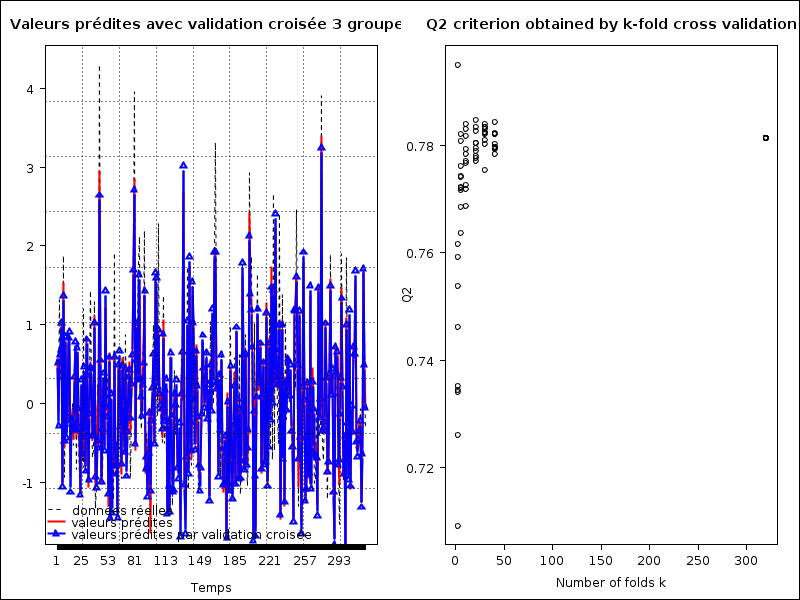

In [ ]:
library(DiceEval)
Y <- simple$model[,1]
X <- data.frame(simple$model[,2:ncol(simple$model)])
colnames(X) <- c(paste( "X", c(1:ncol(X)), sep=""))
formula <- as.formula(paste("Y~", paste (paste("X", c(1:ncol(X)), sep=""),
                                         collapse="+"),sep=""))


model.CV <- modelFit(X,Y, type = "Linear", formula = formula)
## Nombre de groupes :
K = 3
## Validation croisée :
CV <- crossValidation(model.CV ,K=K)
## Figure présente dans le corps de la thèse : visualisation de la validation croisée
par(mfrow = c(1,2))
plot(as.ts(Y), lty = 2, xlab = "", ylab = "", axes = FALSE,
     main = paste("Valeurs prédites avec validation croisée ",K," groupes",sep=""))
lines(as.ts(model.CV$model$fitted.values), lwd = 2, col = 'red')
lines(as.ts(CV$Ypred), type = 'b', lwd = 2, pch = 2, col = 'blue')
axis(1,at = N, labels = N)
mtext(side = 1, las = 1, text = "Temps", line = 3.5)
axis(2)
box()
grid(9,lwd=1, col="1")
legend("bottomleft",
       c("données réelles", "valeurs prédites", "valeurs prédites par validation croisée"),
       lwd = c(1,2,2), lty = c(2,1,1), pch = c(NA,NA,2), col = c('black', 'red', 'blue'),
       cex = 1, bty="n")
robCV <- testCrossValidation(model.CV)

grid(9,lwd=1, col="1")
mean(robCV)

In [1]:
## A rajouter :
# code cleansing
# vérification des résidus
# random forest, random forest avec IC

starting httpd help server ... done
